In [129]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd 

%matplotlib inline

In [130]:
df_airline=pd.read_csv('airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [131]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [132]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [133]:
df_airline.dropna(axis=0,inplace=True)

In [134]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [135]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [136]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [137]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [138]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [139]:
df_airline.set_index('Month',inplace=True)

In [140]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<Axes: xlabel='Month'>

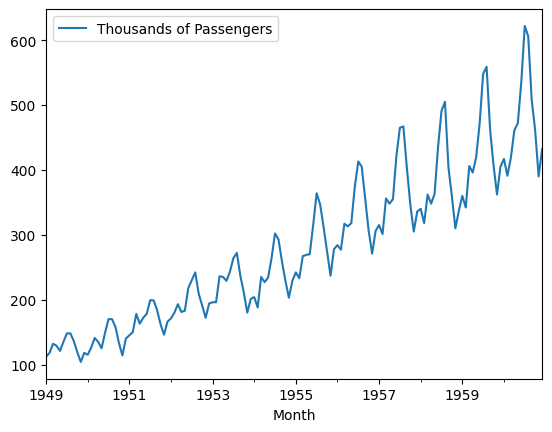

In [141]:
df_airline.plot()

In [142]:
from statsmodels.tsa.stattools import adfuller

In [143]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [144]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060441
p- value: 0.9918802434376409
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [145]:
## Use Techniques Differencing
df_airline['Passengers First Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [146]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [147]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics: -2.8292668241700034
p- value: 0.05421329028382497
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [148]:
## Use Techniques Differencing
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)

In [149]:
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics: -16.38423154246852
p- value: 2.732891850014085e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [150]:
### 12 months 
## Use Techniques Differencing
df_airline['Passengers 12 Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)

In [151]:
adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistics: -3.3830207264924796
p- value: 0.011551493085515008
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [152]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

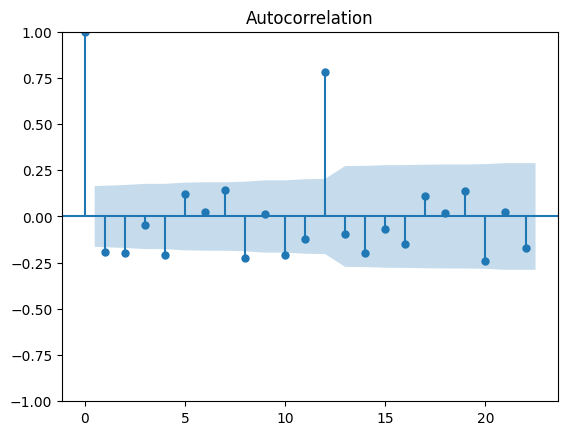

In [153]:
acf = plot_acf(df_airline["Passengers Second Difference"].dropna())

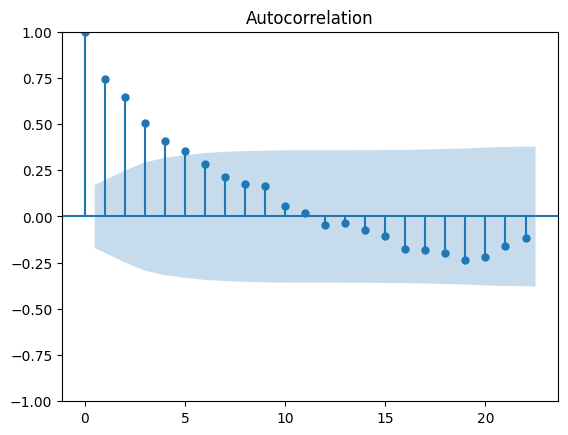

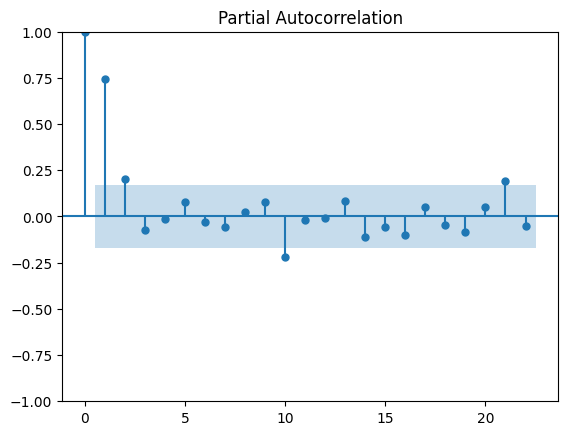

In [154]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

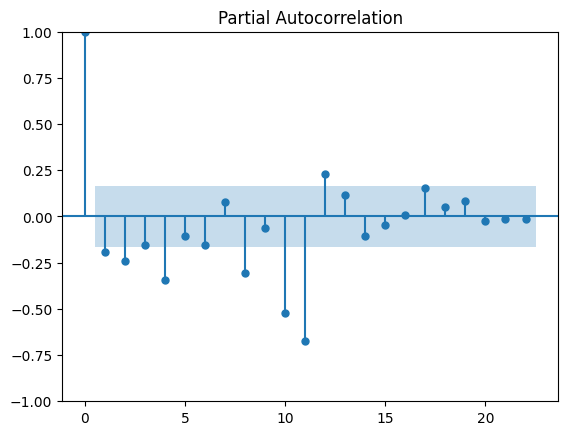

In [155]:
result = plot_pacf(df_airline["Passengers Second Difference"].dropna())

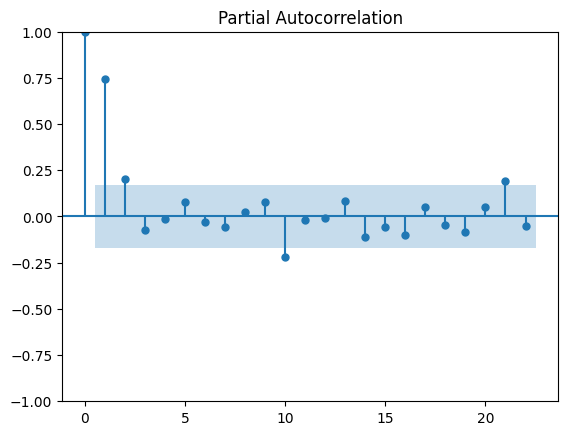

In [156]:
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [157]:
### split train and test data
df_airline

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [158]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [159]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [160]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [161]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [162]:
## create a ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [163]:
train_data.head(1)

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN


In [164]:
model_ARIMA=ARIMA(train_data['Thousands of Passengers'],order=(0,2,0))

c:\Users\VIJAY\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\VIJAY\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\VIJAY\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [165]:
model_Arima_fit=model_ARIMA.fit()

In [166]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                      ARIMA(0, 2, 0)   Log Likelihood                -385.792
Date:                     Sun, 17 Sep 2023   AIC                            773.584
Time:                             22:21:34   BIC                            775.991
Sample:                         01-01-1949   HQIC                           774.550
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       714.5859    102.414      6.977      0.000     513.858     915.314
===================================================================================
Ljung-Box (L1) (Q):                   4.59   Jarque-Bera (JB):                 1.74
Prob(Q):                              0.03   Prob(JB):                         0.42
Heteroskedasticity (H):               3.19   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [167]:
test_data.head(1)

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0


In [168]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [169]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

In [170]:
pred.head(1)

1956-01-01    319.0
Freq: MS, Name: predicted_mean, dtype: float64

In [171]:
residuals.head(1)

Month
1956-01-01   -35.0
dtype: float64

<Axes: ylabel='Density'>

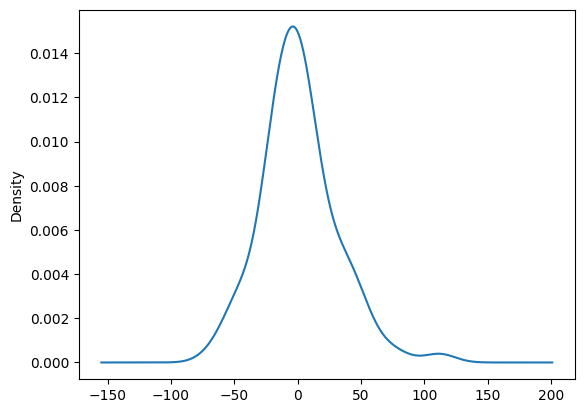

In [172]:
model_Arima_fit.resid.plot(kind='kde')

In [173]:
test_data['Predicted_ARIMA']=pred

C:\Users\VIJAY\AppData\Local\Temp\ipykernel_4012\95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<Axes: xlabel='Month'>

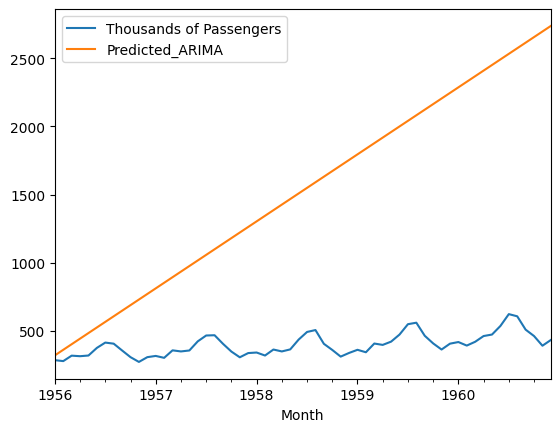

In [174]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

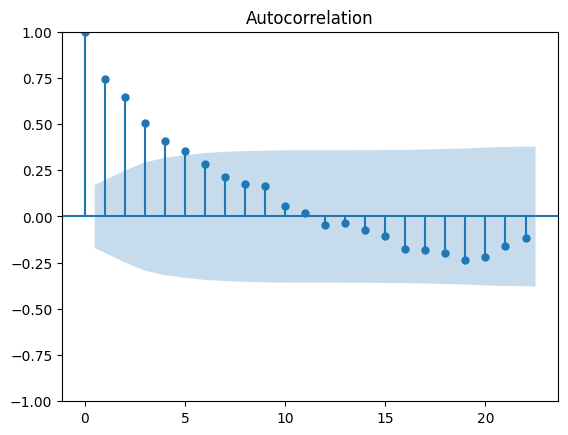

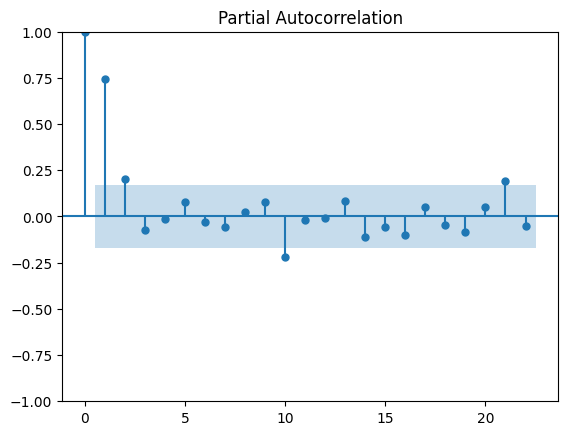

In [175]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [176]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [177]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

c:\Users\VIJAY\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\VIJAY\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [178]:
model_SARIMA_fit=model_SARIMA.fit()

c:\Users\VIJAY\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [179]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.240
Date:                             Sun, 17 Sep 2023   AIC                            548.481
Time:                                     22:21:37   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5983      0.938      0.638      0.523      -1.240       2.436
ar.L2          0.8311      0.232      3.581      0.000       0.376       1.286
ar.L3         -0.4525      0.894     -0.506      0.613      -2.205       1.300
ma.L1          0.1837      1.164      0.158      0.875      -2.099       2.466
ma.L2         -0.5342      1.262     -0.423      0.672      -3.008       1.940
ma.L3         -0.0986      0.384     -0.257      0.797      -0.852       0.654
ma.L4         -0.1273      0.337     -0.377      0.706      -0.789       0.534
ma.L5          0.2471      0.357      0.693      0.489      -0.452       0.946
sigma2        87.7320     81.155      1.081      0.280     -71.330     246.794
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [180]:
test_data.tail()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA
Month,,,,,
1960-08-01,606.0,-16.0,-103.0,47.0,2574.0
1960-09-01,508.0,-98.0,-82.0,45.0,2615.0
1960-10-01,461.0,-47.0,51.0,54.0,2656.0
1960-11-01,390.0,-71.0,-24.0,28.0,2697.0
1960-12-01,432.0,42.0,113.0,27.0,2738.0


In [181]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [182]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima

<Axes: xlabel='Month'>

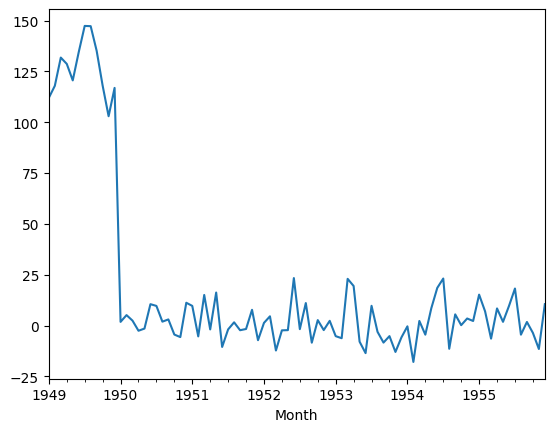

In [183]:
model_SARIMA_fit.resid.plot()

<Axes: ylabel='Density'>

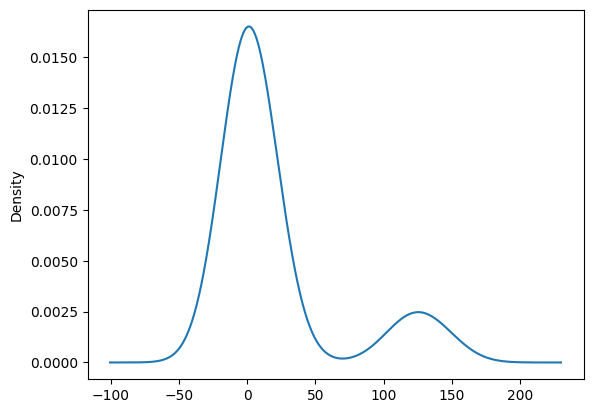

In [184]:
model_SARIMA_fit.resid.plot(kind='kde')

In [185]:
test_data['Predicted_SARIMA']=pred_Sarima

C:\Users\VIJAY\AppData\Local\Temp\ipykernel_4012\1367177785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


In [186]:
test_data.head(1)

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,319.0,NaN


<Axes: xlabel='Month'>

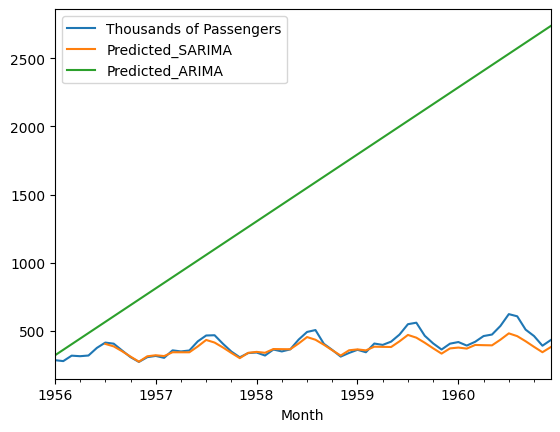

In [187]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()